# DSO-570-Interim Deliverable 1
# Team 2

## Import the files, explore the variables and create metrics

In [27]:
#Importing packages
import pandas as pd
import numpy as np
#Reading excel files
schedule=pd.read_excel('Marshall_Course_Enrollment_1516_1617.xlsx')
cancelled=pd.read_excel('Cancelled_Courses_1516_1617.xlsx') # not used in Interim Deliverable 1
capacities=pd.read_excel('Marshall_Room_Capacity_Chart.xlsx') 
pd.set_option("display.max_columns",100)   # Display all columns so you can see the DataFrame better.
master=schedule 
master.head()
roomSet=set(capacities.Room)      # Create a set which contains the rooms in the capacities file.


In [28]:
# define the metrics as the new columns
master['Revenue']=master['Min Units']*master['Reg Count']*1900  # define our metric : revenue per course, price per unit*unit of course* no. of student
master['Revenue_Max']=master['Min Units']*master['Seats']*1900 # define maximum revenue : price per unit*unit of course* no. of seat
master['Revenue_Ratio']=master['Revenue']/master['Revenue_Max'] # define a revenue ratio as an indicator of how efficiently the department do with the scheduling
masterTable=master[['Term','First Room','Course','Department','Max Units','Min Units','Reg Count','Seats','Revenue','Revenue_Max','Revenue_Ratio']]
room=metric['First Room']
a=[]
for i in room:
    a.append(i in roomSet)

masterTable=masterTable.loc[a,:]  # exclude courses in the classrooms that are not in the room capacity file
masterTable.head(10)

,Term,First Room,Course,Department,Max Units,Min Units,Reg Count,Seats,Revenue,Revenue_Max,Revenue_Ratio
0,20153,SLH200,ACCT-370,ACCT,0.0,0.0,106,135,0.0,0.0,NaN
1,20153,ACC303,ACCT-370,ACCT,4.0,4.0,24,42,182400.0,319200.0,0.571429
2,20153,ACC303,ACCT-370,ACCT,4.0,4.0,40,42,304000.0,319200.0,0.952381
3,20153,ACC303,ACCT-370,ACCT,4.0,4.0,42,42,319200.0,319200.0,1.000000
4,20153,SLH200,ACCT-371,ACCT,0.0,0.0,110,150,0.0,0.0,NaN
5,20153,ACC303,ACCT-371,ACCT,4.0,4.0,29,42,220400.0,319200.0,0.690476
6,20153,ACC303,ACCT-371,ACCT,4.0,4.0,40,42,304000.0,319200.0,0.952381
7,20153,ACC303,ACCT-371,ACCT,4.0,4.0,41,42,311600.0,319200.0,0.976190
8,20153,HOH EDI,ACCT-372,ACCT,0.0,0.0,144,269,0.0,0.0,NaN
9,20153,ACC310,ACCT-372,ACCT,2.0,2.0,50,53,190000.0,201400.0,0.943396


In [29]:
masterTable['Department'].unique()

array(['ACCT', 'BAEP', 'UG Programs', 'FBE', 'BUCO', 'MOR', 'MKT', 'DSO',
       'OMBA Program', 'MMLIS Core', 'FT MBA Core', 'G Programs',
       'PM MBA Program', 'EMBA Program', 'MBV Program', 'GEMBA Program',
       'FIM Program', 'MMM Program', 'FT MBA Program', 'IBEAR Program'], dtype=object)

## Metric 01 - Utilization Rate (Registered Count of Students/Number of Seats Available)

    Term     Department  Reg Count  Seats
0  20153           ACCT       4982   6345
1  20153           BAEP       1341   1592
2  20153           BUCO       2131   2290
3  20153            DSO       5019   5378
4  20153   EMBA Program        679    737
5  20153            FBE       3583   4252
6  20153    FT MBA Core        211    225
7  20153     G Programs         96    178
8  20153  GEMBA Program         62     80
9  20153    MBV Program         52     52


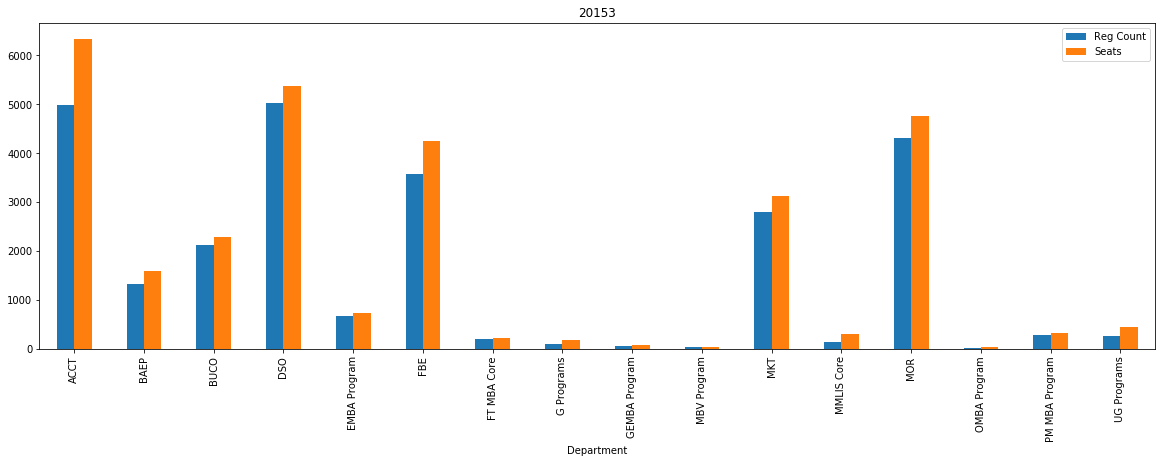

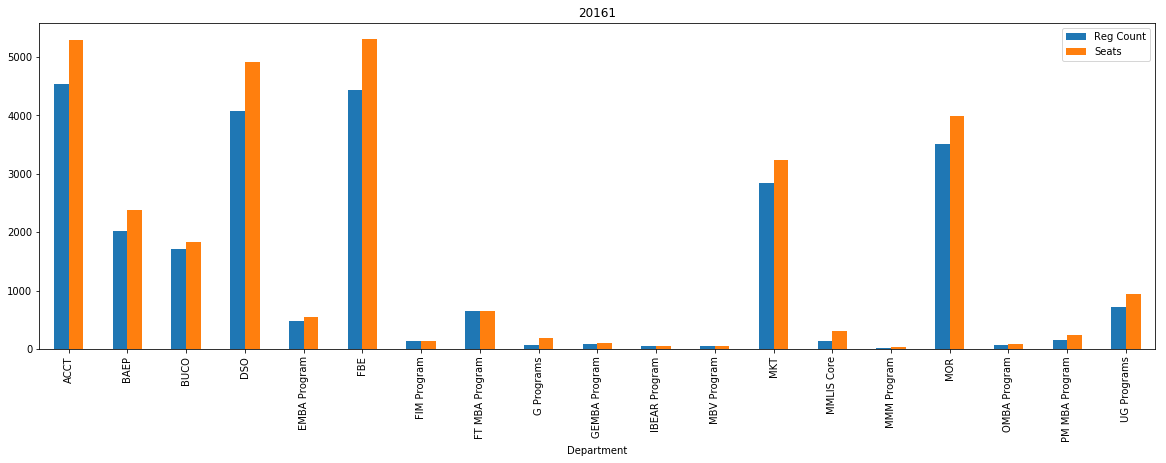

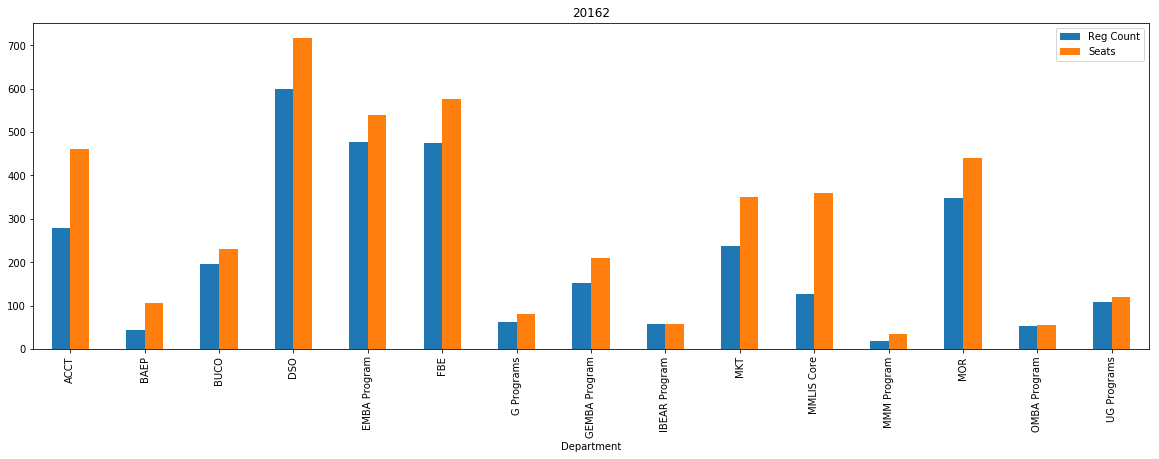

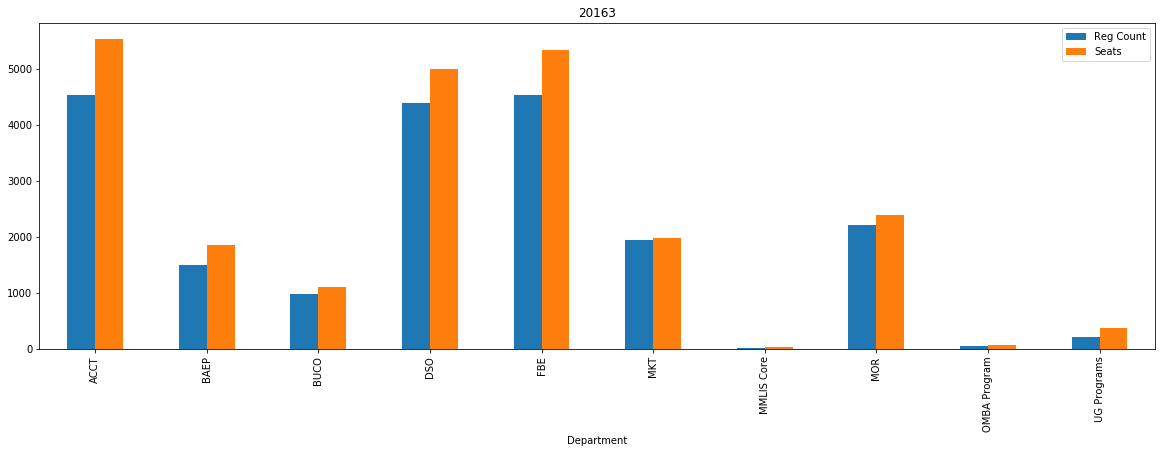

In [30]:
# visualization: plot and compare registered count and seats across the departments
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
output1=masterTable.groupby(['Term','Department'])['Reg Count','Seats'].sum() # aggregate the metrics to department level
output1=output1.reset_index() # convert the group object back to dataframe with proper index that can be manipulated
print(output1.head(10))

#plot and compare the registered count and seats of each department

for term in [20153,20161,20162,20163,20171,20172]: 
        try:
            #print(output1.query("Term==@term"))
            (output1.query("Term==@term").sort_values(['Department'])
             .plot(x='Department',y=['Reg Count','Seats'],by='Department',kind='bar',stacked=False,title='{0}'.format(term),figsize=(20,6),legend=True)
            )
        except:
            continue
plt.show()


    Term  Reg Count  Seats
0  20153      26012  30161
1  20161      25813  30322
2  20162       3233   4336
3  20163      20422  23723


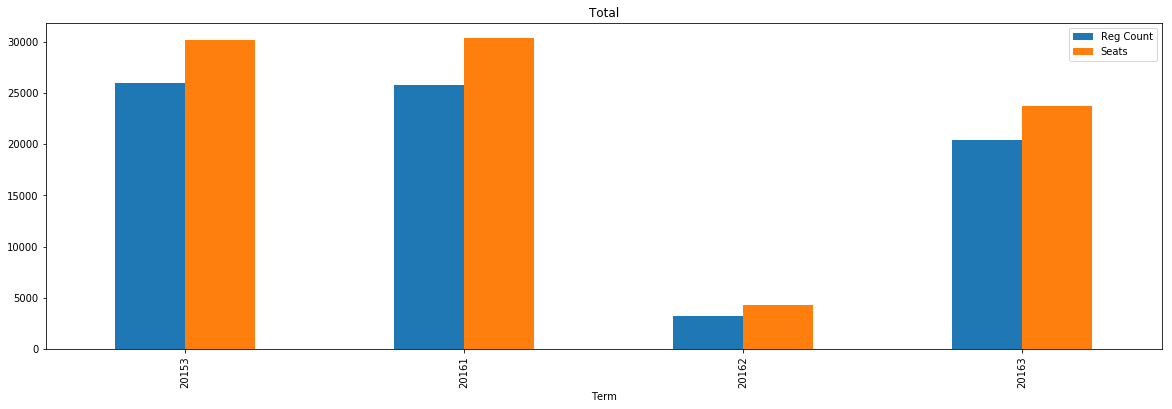

In [31]:
# visualization: plot and compare registered count and seats across the terms
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
output2=masterTable.groupby(['Term'])['Reg Count','Seats'].sum() # aggregate the metrics to Marshall level
output2=output2.reset_index() # convert the group object back to dataframe with proper index that can be manipulated
print(output2.head(10))
#plot the aggregate revenue of Marshall and compare it with the maximum possible revenue
(output2.sort_values(['Term']).plot(x='Term',y=['Reg Count','Seats'],by='Term',kind='bar',stacked=False,title='Total',figsize=(20,6),legend=True)
            )
plt.show()


    Term  Reg Count  Seats     ratio
0  20153      16706  19432  0.859716
1  20161      15410  17882  0.861760
2  20162       2290   2861  0.800419
3  20163      21745  25119  0.865679
4  20171      22368  27281  0.819911
5  20172       2000   2631  0.760167


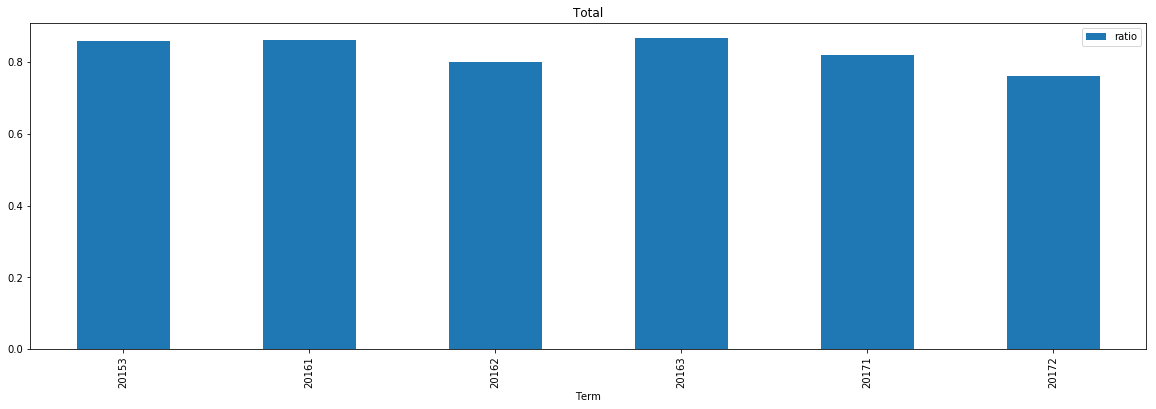

In [32]:
# visualization: plot the ratio of registered count and seats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
output2=metric.groupby(['Term'])['Reg Count','Seats'].sum()
output2=output2.reset_index()
output2['ratio']=output2['Reg Count']/output2['Seats'] # we can also use a ratio as a metric : it is actually the united-weighted utilization rate
print(output2.head(10)) 
(output2.sort_values(['Term']).plot(x='Term',y=['ratio'],by='Term',kind='bar',stacked=False,title='Total',figsize=(20,6),legend=True)
            )
plt.show()

## Metric 02 - Revenue per Course 

In [33]:
# visualization: plot our metric: 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

output=masterTable  # plot the revenue of each course under each department and compare it with the maximum possible revenue
for term in [20171]:  
    for dep in ['ACCT', 'BAEP', 'UG Programs', 'FBE', 'BUCO', 'MOR', 'MKT', 'DSO',
       'OMBA Program', 'MMLIS Core', 'FT MBA Core', 'G Programs',
       'PM MBA Program', 'EMBA Program', 'MBV Program', 'GEMBA Program',
       'FIM Program', 'MMM Program', 'FT MBA Program', 'IBEAR Program']:
        try:
            (output.query("Term==@term & Department==@dep").sort_values(['Course'])
             .plot(x='Course',y=['Revenue','Revenue_Max'],by='Course',kind='bar',stacked=False,align='center',title='{0} {1}'.format(term,dep),figsize=(20,10),legend=True)
            )
        except:
            continue
plt.show()

    Term     Department     Revenue  Revenue_Max
0  20153           ACCT  23863050.0   27312500.0
1  20153           BAEP   8115850.0    9361300.0
2  20153           BUCO  13165100.0   13933650.0
3  20153            DSO  22401000.0   23880150.0
4  20153   EMBA Program   5867200.0    6416300.0
5  20153            FBE  21864250.0   25634800.0
6  20153    FT MBA Core    601350.0     641250.0
7  20153     G Programs    431300.0     672600.0
8  20153  GEMBA Program   1295800.0    1672000.0
9  20153    MBV Program    889200.0     889200.0


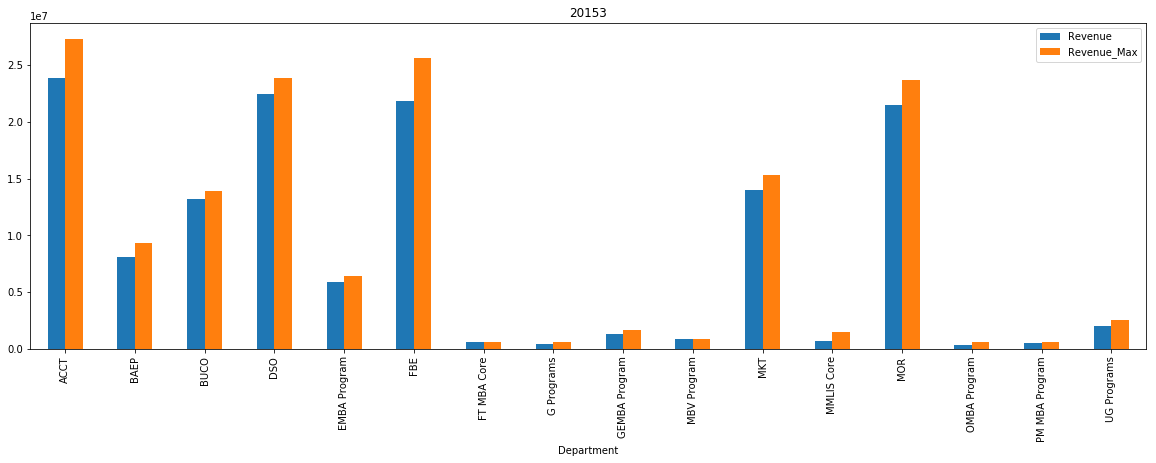

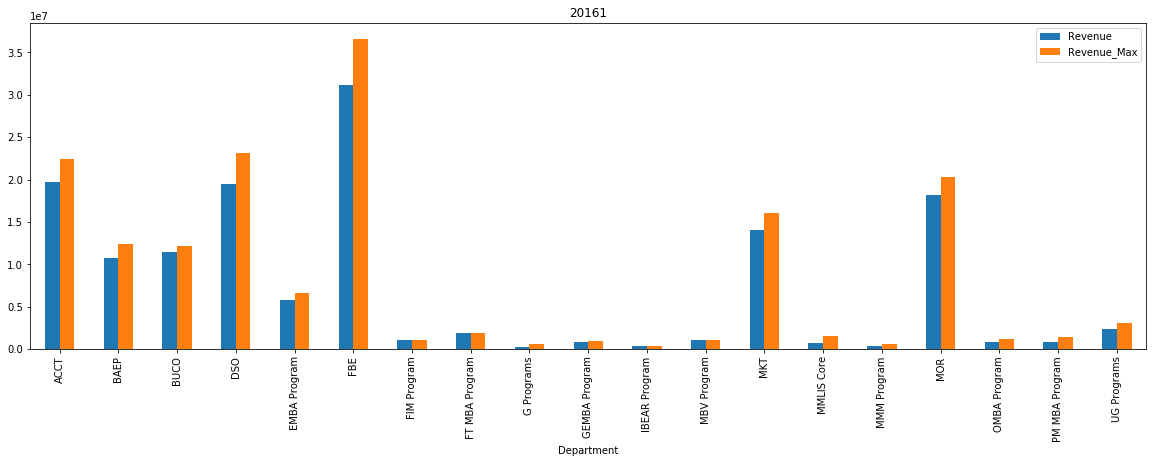

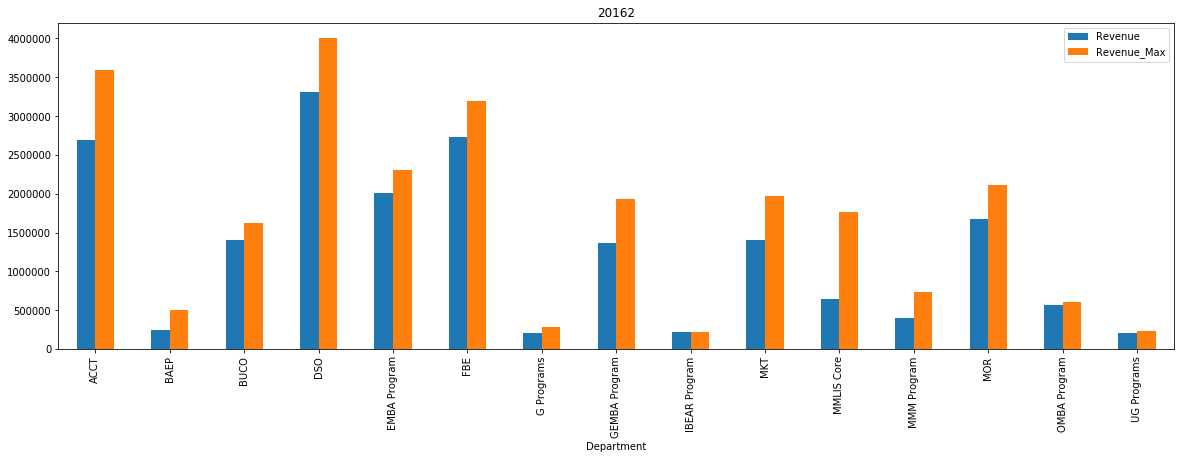

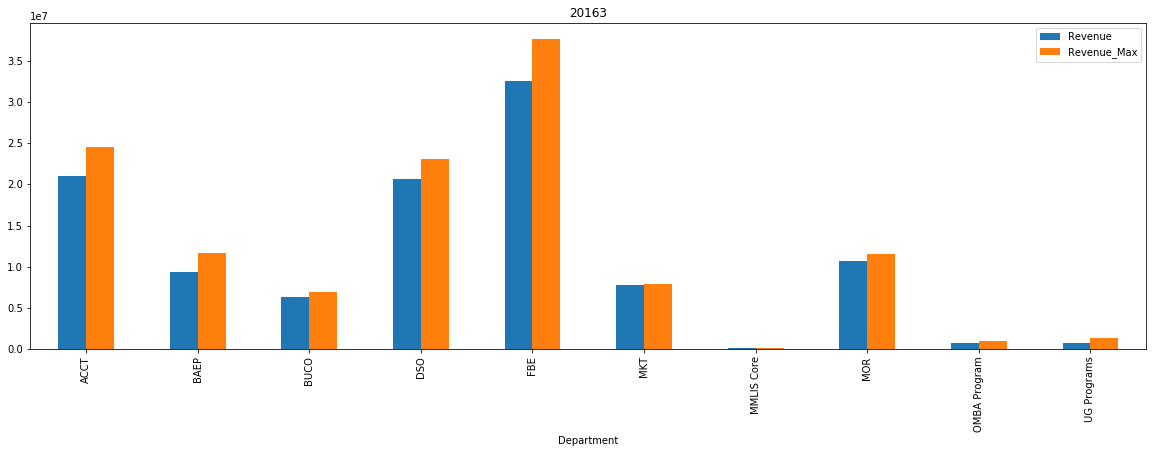

In [34]:
# visualization: plot and compare the revenue and the maximum revenue across the departments
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
output1=masterTable.groupby(['Term','Department'])['Revenue','Revenue_Max'].sum() # aggregate the metrics to department level
output1=output1.reset_index() # convert the group object back to dataframe with proper index that can be manipulated
print(output1.head(10))

#plot the aggregate revenue of each department and compare it with the maximum possible revenue
for term in [20153,20161,20162,20163,20171,20172]: 
        try:
            #print(output1.query("Term==@term"))
            (output1.query("Term==@term").sort_values(['Department'])
             .plot(x='Department',y=['Revenue','Revenue_Max'],by='Department',kind='bar',stacked=False,title='{0}'.format(term),figsize=(20,6),legend=True)
            )
        except:
            continue
plt.show()


    Term      Revenue  Revenue_Max
0  20153  137684450.0  154666650.0
1  20161  141175700.0  163351550.0
2  20162   19073150.0   25061950.0
3  20163  109948250.0  125786650.0


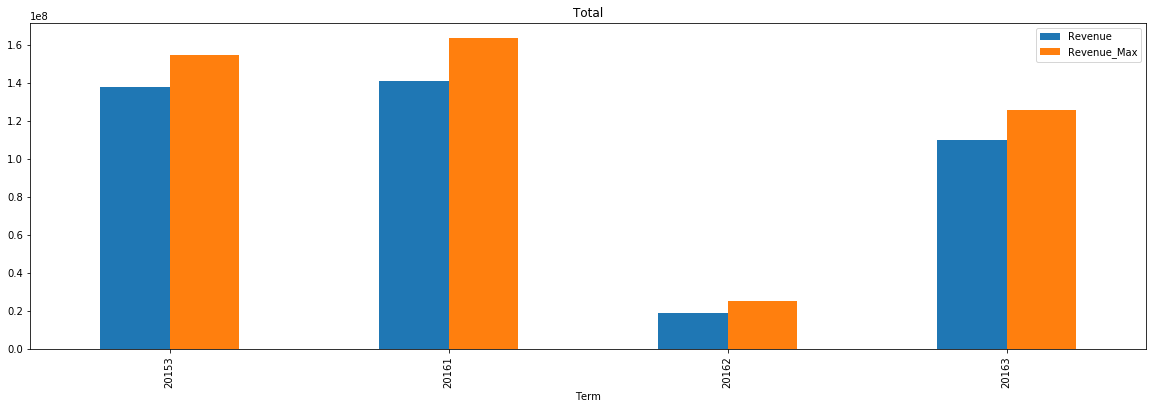

In [35]:
# visualization: plot and compare the revenue and the maximum revenue across the terms
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
output2=masterTable.groupby(['Term'])['Revenue','Revenue_Max'].sum() # aggregate the metrics to Marshall level
output2=output2.reset_index() # convert the group object back to dataframe with proper index that can be manipulated
print(output2.head(10))
#plot the aggregate revenue of Marshall and compare it with the maximum possible revenue
(output2.sort_values(['Term']).plot(x='Term',y=['Revenue','Revenue_Max'],by='Term',kind='bar',stacked=False,title='Total',figsize=(20,6),legend=True)
            )
plt.show()


    Term      Revenue  Revenue_Max     ratio
0  20153   87185300.0   97447200.0  0.894693
1  20161   83586700.0   96580800.0  0.865459
2  20162   13697100.0   16818800.0  0.814392
3  20163  122603200.0  139599650.0  0.878249
4  20171  123708050.0  148677850.0  0.832054
5  20172   12170450.0   15909650.0  0.764973


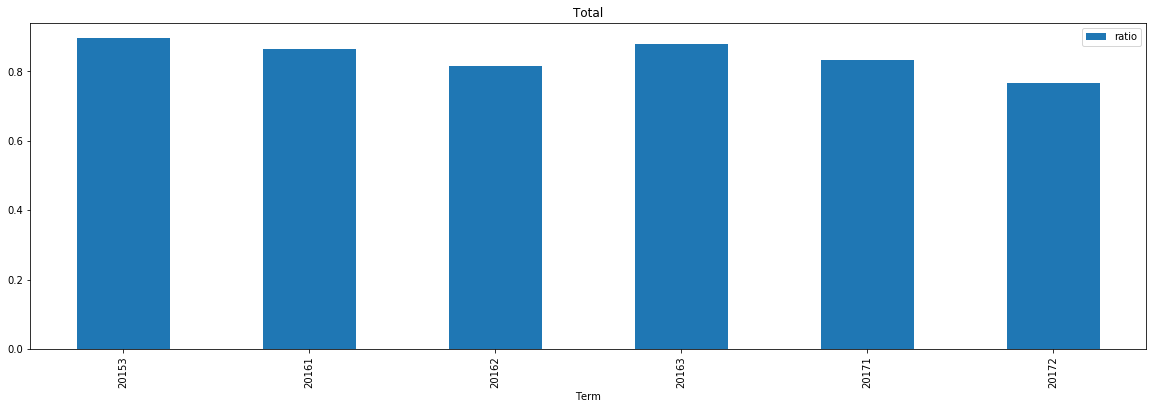

In [36]:

# visualization: plot the ratio of revenue to the maximum revenue  
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
output2=metric.groupby(['Term'])['Revenue','Revenue_Max'].sum()
output2=output2.reset_index()
output2['ratio']=output2['Revenue']/output2['Revenue_Max'] # we can also use a ratio as a metric : it is actually the united-weighted utilization rate
print(output2.head(10)) 
(output2.sort_values(['Term']).plot(x='Term',y=['ratio'],by='Term',kind='bar',stacked=False,title='Total',figsize=(20,6),legend=True)
            )
plt.show()
